**Salary Prediction using Linear Regression**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Salary_Data.csv") # Converts into a data frame
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
x = data.iloc[:]['YearsExperience'].values  # .values coverts it into an array
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [6]:
y = data.iloc[:]['Salary'].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
# For using linear regression library function we need to make the arrays into 2-D array
x.reshape(len(x),1)

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y = y.reshape(len(y), 1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [9]:
# Divide the data into training and testing samples
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

In [19]:
xtrain.ndim
xtrain.shape

(24, 1)

In [11]:
xtest.shape

(6,)

In [13]:
ytrain.shape

(24, 1)

In [14]:
ytest.shape

(6, 1)

In [15]:
#### Building the model
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [16]:
xtrain = xtrain.reshape(len(xtrain), 1)
#ytrain.reshape(len(ytrain), 1)
#model.fit(xtrain,ytrain)

In [17]:
xtrain.shape

(24, 1)

In [18]:
##### training the Linear Regression model
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:

print(xtest.shape)
xtest = xtest.reshape(len(xtest), 1)
print(xtest.shape)

(6, 1)
(6, 1)


In [22]:
xtest.shape

(6, 1)

In [23]:
#### Predicting the value
ypred = model.predict(xtest)
ypred

array([[ 63964.99336869],
       [116315.40721542],
       [ 54616.70518178],
       [103227.80375374],
       [ 63964.99336869],
       [ 72378.45273692]])

In [24]:
ytest

array([[ 56957.],
       [112635.],
       [ 60150.],
       [113812.],
       [ 55794.],
       [ 67938.]])

In [25]:
#### Calculating R2 score
### r2_score, also called the regression score function is used to test the performance of the model. A r2 score of 1 is the best case.
from sklearn.metrics import r2_score
r2 = r2_score(ytest, ypred)
r2

0.9239709369450325

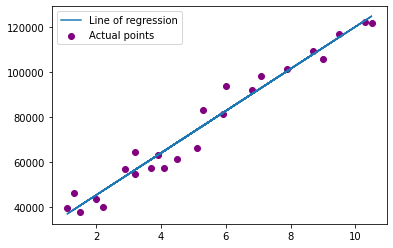

In [26]:
##### Drawing the Line of Regression (Training Samples)
plt.scatter(xtrain, ytrain, color='purple', label="Actual points")
plt.plot(xtrain, model.predict(xtrain), label="Line of regression")
plt.legend(loc=2) ## Specifies the quadrant of the legend to be present
plt.show()

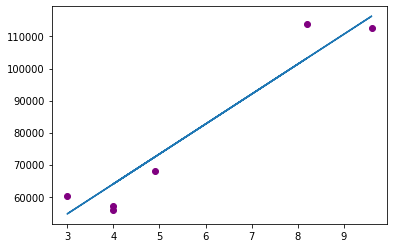

In [27]:
##### Drawing the line of regression (Testing Sample)
##### Drawing the Line of Regression (Training Samples)
plt.scatter(xtest, ytest, color='purple')
plt.plot(xtest, ypred)
plt.show()

In [28]:
#### Printing m and c values of the equation
## We know that any linear regression is going to be of the form y = mx + c
m = model.coef_
c = model.intercept_
print(m,c)

[[9348.28818692]] [26571.84062103]


In [29]:
#### Predicting for a new value
model.predict([[10.5]])

array([[124728.86658364]])

In [30]:
###### Saving the trained models
## Saving a model in pickle allows for reloading the model and thus skips the re-training part and the related computational expenses.
from sklearn.externals import joblib
joblib.dump(model, "Salry_Prediction_LR.pkl")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Salry_Prediction_LR.pkl']

In [31]:
###### Loading the model from stored model file
mymodel = joblib.load('Salry_Prediction_LR.pkl')


In [32]:
mymodel.predict([[10.2]])


array([[121924.38012757]])